In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
holdout_raw_data = pd.read_csv('Test.csv')
train_raw_data = pd.read_csv('Train.csv')

# Exploratory Data Analysis

In [3]:
holdout_raw_data['data_source'] = 'holdout'
train_raw_data['data_source'] = 'train'

In [4]:
print(holdout_raw_data.shape)
print(train_raw_data.shape)

(5681, 12)
(8523, 13)


In [5]:
holdout_raw_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,data_source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,holdout
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,holdout
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,holdout
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,holdout
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,holdout


In [6]:
# combining holdout and training data before exploring and cleaning
data = pd.concat([holdout_raw_data, train_raw_data]).reset_index(drop=True)
print(data.shape)

(14204, 13)


In [7]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,data_source
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750,1999,OUT049,Tier 1,Medium,Supermarket Type1,holdout
1,reg,FDW14,87.3198,NaN,Dairy,0.038428,8.300,2007,OUT017,Tier 2,NaN,Supermarket Type1,holdout
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600,1998,OUT010,Tier 3,NaN,Grocery Store,holdout
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315,2007,OUT017,Tier 2,NaN,Supermarket Type1,holdout
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,holdout


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
data_source                  14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


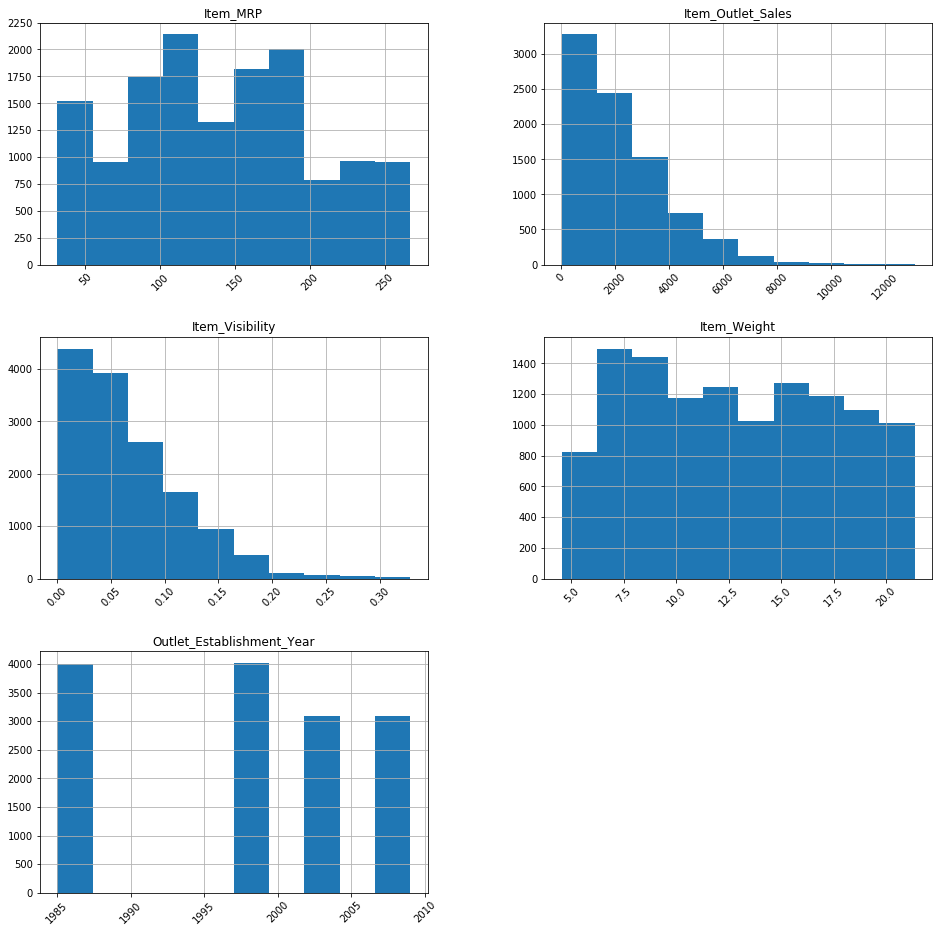

In [9]:
# Plot Histograms of all numeric columns
data.hist(figsize=(16,16), xrot=45)
plt.show()

In [10]:
#Print all column names with datatype 'object'
data.select_dtypes(include=['object']).columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'data_source'],
      dtype='object')

In [11]:
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Outlet_Identifier']

In [12]:
for column in categorical_columns:
    data[column] = data[column].astype('category')    

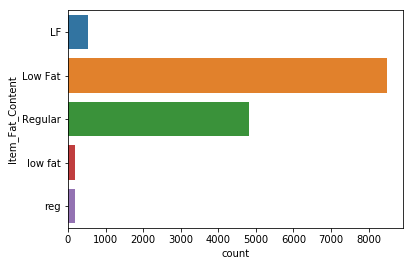

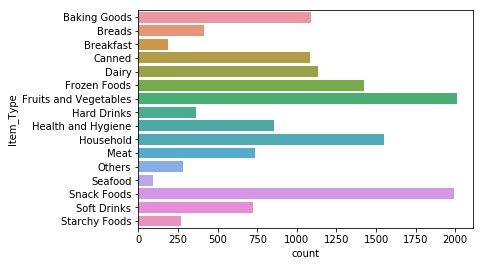

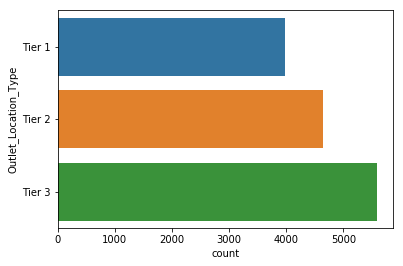

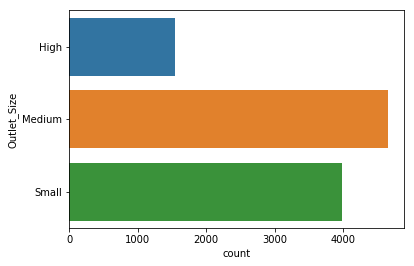

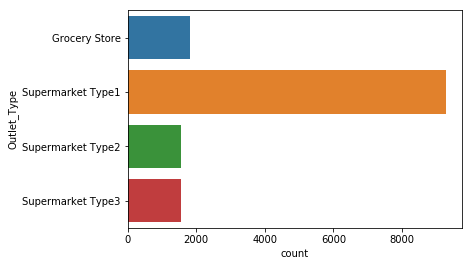

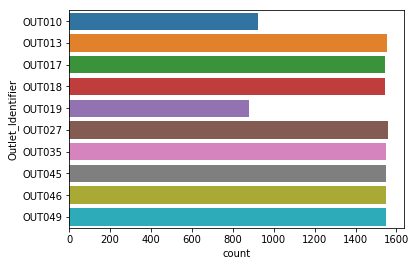

In [13]:
for column in categorical_columns:
    sns.countplot(data=data, y=column)
    plt.show()

# Data Cleaning

## ** Fat Content **
Original data contains five different levels for fat content.  'Low Fat', 'LF, and 'low fat' all corresponds to 'Low Fat'
Similarly 'reg', 'Regular' both corresponds to 'Regular'

In [14]:
# The column values are redundant with different names.  Make them consistent
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'Low Fat': 'Low Fat', 'reg': 'Regular', 'Regular':'Regular', 'LF':'Low Fat', 'low fat':'Low Fat'})

In [15]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
data_source                     0
dtype: int64

## ** Item_weight and Outlet_size are the only column with missing values **

2439 missing entries for Item_Weight. Lets explore them 

In [16]:
data_missing_item_weight = data[data['Item_Weight'].isnull()]
data_grouped_by_outlet = data.groupby('Outlet_Identifier')['Item_Weight'].mean()

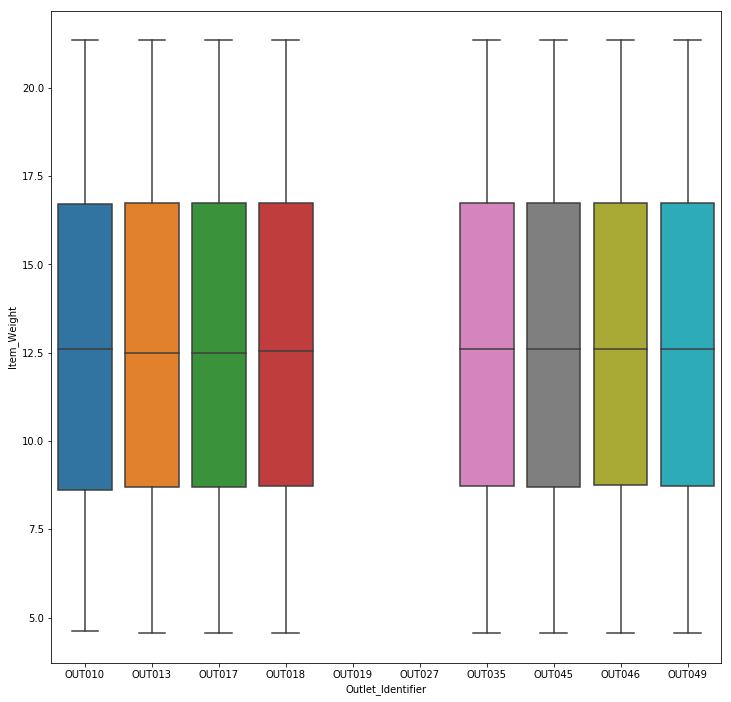

In [17]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Weight')
plt.show()

Out27 and Out19 are the only ones that have not reported Item weights.

The item_weights can be imputed using the mean of other items with the same item_id

In [18]:
# Missing Item weight impute using the mean after grouping by Item_Id
data['Item_Weight'] = data.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

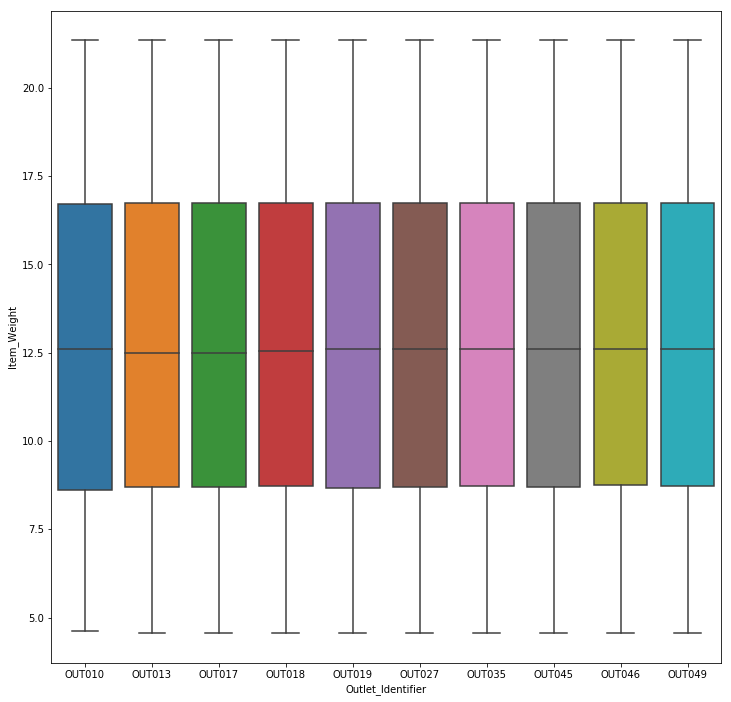

In [19]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Weight')
plt.show()

In [20]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].count()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Item_Outlet_Sales, dtype: int64

In [21]:
data[data['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts()

OUT045    1548
OUT017    1543
OUT010     925
OUT049       0
OUT046       0
OUT035       0
OUT027       0
OUT019       0
OUT018       0
OUT013       0
Name: Outlet_Identifier, dtype: int64

In [22]:
data.pivot_table(index='Outlet_Type', columns=['Outlet_Size'], values='Item_Fat_Content', aggfunc='count', dropna=True)

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,NaN,NaN,880.0
Supermarket Type1,1553.0,1550.0,3100.0
Supermarket Type2,NaN,1546.0,NaN
Supermarket Type3,NaN,1559.0,NaN


All grocery stores are 'Small' and all supermarket type1 and type3 are 'Medium'

In [23]:
data[data['Outlet_Identifier'].isin(['OUT045', 'OUT017', 'OUT010'])]['Outlet_Type'].value_counts()

Supermarket Type1    3091
Grocery Store         925
Supermarket Type3       0
Supermarket Type2       0
Name: Outlet_Type, dtype: int64

All missing values for outlet_size for grocery stores and supermarket type1 can be imputed with 'Small' since that is the most common size

In [24]:
data['Outlet_Size'].fillna('Small', inplace=True)

** Spotting outliers **

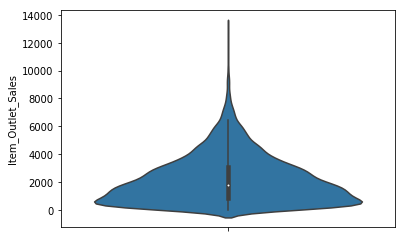

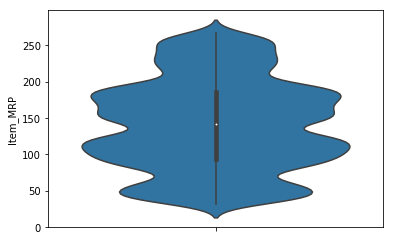

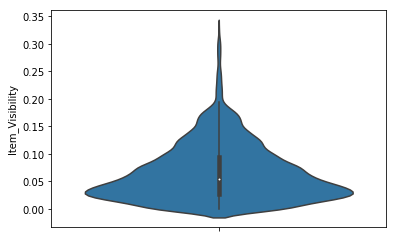

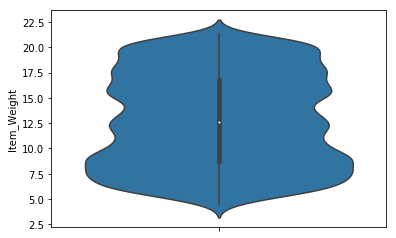

In [25]:
sns.violinplot(data['Item_Outlet_Sales'], orient='v')
plt.show()
sns.violinplot(data['Item_MRP'], orient='v')
plt.show()
sns.violinplot(data['Item_Visibility'], orient='v')
plt.show()
sns.violinplot(data['Item_Weight'], orient='v')
plt.show()

None of the numeric columns have any outliers that need to be discarded

In [26]:
# Save cleaned dataset for future use
data.to_csv('cleaned_data.csv', index=False)

## Feature Engineering

In [27]:
data = pd.read_csv('cleaned_data.csv')

In [28]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,data_source
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750,1999,OUT049,Tier 1,Medium,Supermarket Type1,holdout
1,Regular,FDW14,87.3198,NaN,Dairy,0.038428,8.300,2007,OUT017,Tier 2,Small,Supermarket Type1,holdout
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600,1998,OUT010,Tier 3,Small,Grocery Store,holdout
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315,2007,OUT017,Tier 2,Small,Supermarket Type1,holdout
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,13.600,1985,OUT027,Tier 3,Medium,Supermarket Type3,holdout


In [29]:
data['Outlet_age'] = 2017 - data['Outlet_Establishment_Year']
# data.drop('Outlet_Establishment_Year', axis=1, inplace=True)

In [30]:
data['Item_MRP_2'] = data['Item_MRP'] ** 2

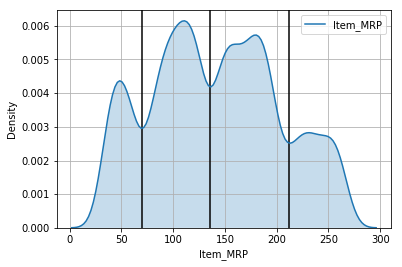

In [31]:
sns.kdeplot(data['Item_MRP'], shade=True)
plt.xlabel('Item_MRP')
plt.ylabel('Density')
plt.grid(which='both')
plt.vlines([70,136,212], 0,0.007)
plt.show()

The density plot of the price shows four categories of prices which can then be classified as 1,2,3,4 instead of 'Low', 'Medium', 'High' and 'Very High'
to preserve the order.

In [32]:
data['price_class'] = pd.cut(data['Item_MRP'],[0,70,136,212,350], retbins=False, labels=[1,2,3,4])
print(data[['price_class', 'Item_MRP']].head())

  price_class  Item_MRP
0           2  107.8622
1           2   87.3198
2           4  241.7538
3           3  155.0340
4           4  234.2300


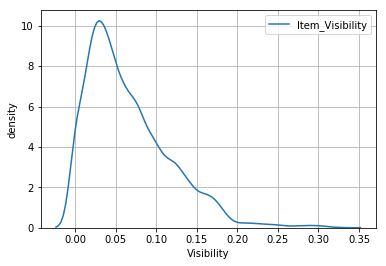

In [33]:
#Plotting density plot of visiblity
sns.kdeplot(data['Item_Visibility'])
plt.xlabel('Visibility')
plt.ylabel('density')
plt.grid(which='both')
plt.show()

Visibility column has many zeroes which doesn't make sense.  It very likely indicates missing values rather a low value.  Hence it is necessary to impute.  
One of the sensible approach is to groupby the outlet and by Item_type and impute using the median visibility 

In [34]:
np.random.seed(99)
np.random.choice(data['Item_Visibility'], size=1)[0]

0.039715591000000001

In [35]:
data['Item_Visibility'] = data.groupby(['Outlet_Identifier', 'Item_Type'])['Item_Visibility'].transform(lambda x: x.replace(0, x.median()))

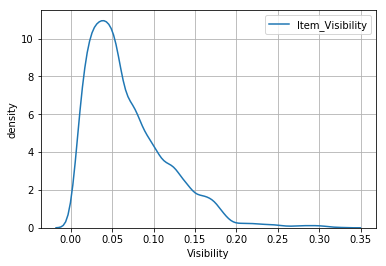

In [36]:
#Plotting density plot of visiblity
sns.kdeplot(data['Item_Visibility'])
plt.xlabel('Visibility')
plt.ylabel('density')
plt.grid(which='both')
plt.show()

In [37]:
def create_dummies(df, col_name):
    dummies = pd.get_dummies(df[col_name],prefix=col_name)
    df = pd.concat([df, dummies], axis=1)
    return df

In [38]:
for column in categorical_columns:
    data = create_dummies(data, column)

In [39]:
train = data[data['data_source'] == 'train'].select_dtypes(exclude=['object', 'category'])
holdout = data[data['data_source'] == 'holdout'].select_dtypes(exclude=['object', 'category'])

In [40]:
train.shape

(8523, 45)

In [41]:
holdout.shape

(5681, 45)

## Model Training

In [42]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']
print(X.shape)
print(y.shape)

(8523, 44)
(8523,)


In [43]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6818, 44) (6818,) (1705, 44) (1705,)


It is required to scale the data since the values have a large range

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [46]:
X_holdout = holdout.drop('Item_Outlet_Sales', axis=1)

# XGBBoost

In [47]:
def generate_results(model):
    
    pred = model.predict(X_holdout)
    submission_df = holdout_raw_data[['Item_Identifier', 'Outlet_Identifier']]
    submission_df['Item_Outlet_Sales'] = pred
    submission_df.to_csv('submission.csv', index=False)

In [48]:
import xgboost as xgb

In [49]:
xgb_param_grid = {
    'learning_rate': [0.05],
    'n_estimators': [100],
    'subsample':[0.77],
    'max_depth': [3],
    'min_child_weight': [10],
    'gamma': [0],
    'colsample_bytree':[0.8],
    'reg_alpha': [1]    
}

In [50]:
xg_reg = xgb.XGBRegressor(objective='reg:linear',seed=99,booster='gbtree',nthread=4, scale_pos_weight=1)
grid_mse = GridSearchCV(estimator=xg_reg, param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=4, verbose=1)

In [51]:
grid_mse.fit(X_train, y_train)
print(grid_mse.best_params_)
print(np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s finished


{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100, 'reg_alpha': 1, 'subsample': 0.77}
1073.505483


In [52]:
generate_results(grid_mse.best_estimator_)

C:\ProgramData\Anaconda35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
